In [10]:
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import pandas as pd
import os

# Download latest version
# Download latest version
path = kagglehub.dataset_download("hussainnasirkhan/multiple-linear-regression-dataset")
df = pd.read_csv(os.path.join(path, "Multiple_Linear_Regression_Dataset.csv"))
print("Path to dataset files:", path)

Path to dataset files: C:\Users\vpthi\.cache\kagglehub\datasets\hussainnasirkhan\multiple-linear-regression-dataset\versions\1


In [11]:
# So how to import the dataset?
X_train = df[["age", "experience"]].values
y_train = df["income"].values
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)

#So, it is the 2-D array with 2 features and 30 training examples.
# And, how can we train this data using Linear Regression with many parameters?
# So, presume this, in a one parameter, it is 1-D array. And, the linear regression formula is: fwb = w * x + b
# But, in here, it is a 2-D array. It is the same case but in respective to each training example.
# Say that, the rows are the training examples and the columns are the features.
# So, the linear regression formula is: f_wb = w1 * x1 + w2 * x2 + b
# Why? Because, there are 2 features. So, we need to have 2 weights in respective to that to predict the outcome.
# Therefore, the cost function is: J(W, b) = 1/2m * sum((fwb - y) ** 2)
# Let's implement this.

In [12]:
def compute_cost(X, y, w, b):
    m = len(y)
    total_cost = 0
    for i in range(m):
        f_wb = np.dot(X[i], w) + b #Dot product of 1-D and 2-D. Vectorization.
        total_cost += (f_wb - y[i]) ** 2
    total_cost = total_cost / (2 * m)
    return total_cost
# So, why vectorization? It is faster because it useds optimized C code in the backend.
# np.dot() is like w1 * x1 + w2 * x2 + ... + xn * wn
# Once done, the total_cost is divided by 2m. And scalar too.

In [13]:
# Moving onto Gradient Descent, the formula is: 1/m * sum((fwb - y) * xj) for each j
# Why is this? Because we need to calculate the gradient for each feature.
# And, the gradient for each feature is calculated by multiplying the error with the respective feature value.
# So, we need to do this for each feature. Hence, the j in xj.
# And, the gradient for b is: 1/m * sum(fwb - y)
# It is like this, you want to minimize the cost function. And, there're a lot of features.
# But, the implementation of gradient descent is like, it will make a certain feature get minimized, and make sure that the cost function of that feature is minimized.
# Then, it will move onto the next feature and do the same thing.
# And, it will keep doing this until all the features are minimized.
# Therefore, it already has descended until the global minimum but for each feature.

def compute_gradient(X, y, w, b):
    m = len(y)
    n = X.shape[1] # Number of features
    dj_dw = np.zeros(w.shape)
    dj_db = 0
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        error = f_wb - y[i]
        for j in range(n):
            dj_dw[j] += error * X[i][j]
            dj_db += error
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db
# So, the dj_dw is a 1-D array with the same shape as w. And, dj_db is a scalar.
# And, the dj_dw is divided by m. And, dj_db is also divided by m.
# So, let's say that we have 2 features. And, the dj_dw has two elements, a vector of each training example.
# So, the first element is the gradient for the first feature. And, the second element is the gradient for the second feature.
# And, the dj_db is the gradient for b. So, we have 3 gradients in total.
# dj_dw[0] is for w1, dj_dw[1] is for w2, and dj_db is for b.

# Now, let's implement the gradient descent function.


In [14]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    w = w_in.copy() #copy the exact array and elements
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
    return w, b
# You may wonder why w-= alpha * dj_dw. But, it is a vector, correct?
# Yes, it is a vector. But the alpha is a scalar. So, it will be multiplied with each element of the vector.
# So, it is like w1 = w1 - alpha * dj_dw1, w2 = w2 - alpha * dj_dw2, ..., wn = wn - alpha * dj_dwn
# And, the b is a scalar. So, it is like b = b - alpha * dj_db
# And, if every single element of w is updated, the whole vector of w is updated.

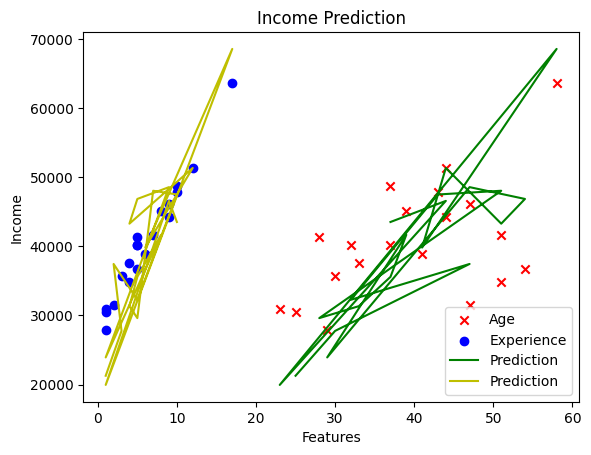

In [15]:
w_init = np.zeros(X_train.shape[1])
b_init = 0
alpha = 0.001
# The learning rate is sometimes slow, and you may know that there are better learning rates. But, we will turn to it later.
num_iters = 1000
w_final, b_final = gradient_descent(X_train, y_train, w_init, b_init, alpha, num_iters)

plt.scatter(X_train[:, 0], y_train, c = 'r', marker = 'x', label = 'Age')
plt.scatter(X_train[:, 1], y_train, c = 'b', marker = 'o', label = 'Experience')
#X_train[:, 0] means all rows of the first column. And, X_train[:, 1] means all rows of the second column.
# [start:stop:step] [: means all] [, 0 means first column] 
# [:, 1 means second column]
# What about 2-D array? It is like X_train[: , 0]
plt.plot(X_train[:, 0], np.dot(X_train, w_final) + b_final, c = 'g', label = 'Prediction')
plt.plot(X_train[:, 1], np.dot(X_train, w_final) + b_final, c = 'y', label = 'Prediction')
plt.xlabel("Features")
plt.ylabel("Income")
plt.title("Income Prediction")
plt.legend()
plt.show()

#You may notice that the line predicting is quite... abnormal, therefore, we need to find a suitable learning rate.


In [16]:
# So, how to find an approriate learning rate?
# In order to find the approriarte learning rate, we can use z score normalization
# As we all know, in order to find the approriate learning rate, we can rescale every feature by both its minimum and maximum
# (x-min)/(max-min). Both way normalizes features to the range of -1 and 1
# xi = xi-ui/ (max-min)
# xi - mean of the training example
# divide by (max-min)
# x[i][j] = (x[i][j] - mean[j])/sigmond of j
# 1/m * sigma from 0 to m-1 (x[i][j] - mean j)^2

#So, how can people come up with this?
# First off, the sum of the numbers and divided by number of the dataset will be mean. 
# And, of course, z-score normalization wants that to be reduced as much as possible. Therefore, mean must be 0.
# But, how can we make a mean become 0?
# 
def zscore_normalize_features(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X-mu)/sigma
    return (X_norm, mu, sigma)


    

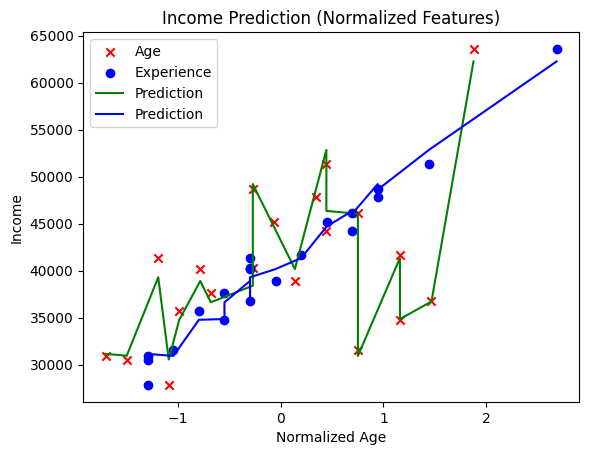

In [29]:
X_norm, mu, sigma = zscore_normalize_features(X_train) 

# Sort by the first feature (e.g., normalized age) for visualization
idx = np.argsort(X_norm[:, 0])
X_sorted = X_norm[idx]
y_sorted = y_train[idx]

plt.scatter(X_sorted[:, 0], y_sorted, c='r', marker='x', label='Age')
plt.scatter(X_sorted[:, 1], y_sorted, c='b', marker='o', label='Experience')
# For plotting predictions, you should use the normalized features and retrain the model on them
w_init = np.zeros(X_sorted.shape[1])
b_init = 0
alpha = 1e-1
num_iters = 1000
w_final_norm, b_final_norm = gradient_descent(X_sorted, y_sorted, w_init, b_init, alpha, num_iters)

plt.plot(X_sorted[:, 0], np.dot(X_sorted, w_final_norm) + b_final_norm, c='g', label='Prediction')
# plt.plot(X_sorted[:, 1], np.dot(X_sorted, w_final_norm) + b_final_norm, c='b', label = 'Prediction') 
idx = np.argsort(X_norm[:, 1])
X_sorted = X_norm[idx]
y_sorted = y_train[idx]
w_final_norm, b_final_norm = gradient_descent(X_sorted, y_sorted, w_init, b_init, alpha, num_iters)
plt.plot(X_sorted[:, 1], np.dot(X_sorted, w_final_norm) + b_final_norm, c='b', label = 'Prediction') 
plt.xlabel("Normalized Age")
plt.ylabel("Income")
plt.title("Income Prediction (Normalized Features)")
plt.legend()
plt.show()

#You may notice that the line predicting is quite... abnormal, therefore, we need to find a suitable learning rate.

# Alright, let's train once again!